In [1]:
import sys
import os
os.chdir('../')

import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline

from tools.tools import save,load,lprint,load_config
from tools.bar import BAR

In [2]:
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN

In [3]:
!ls inputs/boermulders.py

inputs/boermulders.py


In [4]:
conf=load_config('inputs/boermulders.py')
conf['resman']=RESMAN(conf)
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 5023

In [5]:
def get_binned_axis(dataframe, axis):
    return np.unique(dataframe[axis])

def create_rounded_variables(dataframe):
    dataframe['rounded_x'] = np.round(dataframe['x'], 2)
    dataframe['rounded_q2'] = np.round(dataframe['Q2'], 2)
    dataframe['rounded_y'] = np.round(dataframe['y'], 2)
    dataframe['rounded_z'] = np.round(dataframe['z'], 2)
    dataframe['rounded_pt'] = np.round(dataframe['pT'], 2)
    
def append_string_axis(dataframe):
    dataframe['axis'] = dataframe['axis'].astype('str')

In [6]:
datasets = {}

for index, data in conf['resman'].sidisres.tabs.iteritems():
    datasets[index] = pd.DataFrame(data) 
    create_rounded_variables(datasets[index])
    append_string_axis(datasets[index])

In [7]:
def get_subset(data, cuts):
    data_subset = data.query(cuts)
    return data_subset

def get_axis(data, axis): 
    return data.loc[data.axis == axis]

In [8]:
datasets.keys()

[5024, 5019, 5020, 5023]

In [9]:
get_binned_axis(datasets[5020], 'rounded_x')

array([ 0.1 ,  0.19])

In [10]:
def plot(data): 
        
    data_sub_x = get_axis(data, 'x')
    data_sub_z = get_axis(data, 'z')
    data_sub_pt = get_axis(data, 'pt')
    
    # we need to split sometimes 
    data_sub_x['group_index'] = data_sub_x.i-np.mean(data_sub_x.i)
    data_sub_z['group_index'] = data_sub_z.i-np.mean(data_sub_z.i)
    data_sub_pt['group_index'] = data_sub_pt.i-np.mean(data_sub_pt.i)

    data_lower_x = data_sub_x.query('group_index < 0')
    data_upper_x = data_sub_x.query('group_index > 0')
    data_lower_z = data_sub_z.query('group_index < 0')
    data_upper_z = data_sub_z.query('group_index > 0')
    data_lower_pt = data_sub_pt.query('group_index < 0')
    data_upper_pt = data_sub_pt.query('group_index > 0')    
    
    # options 
    plt.figure(figsize=(16,6))
    plt.rc('font', size=16)
    
    plt.subplot(1, 3, 1)
    plt.errorbar(x=data_lower_x['x'], y=data_lower_x.value, yerr=data_lower_x.alpha, 
                 marker='o', linestyle='', color='red')
    plt.plot(data_lower_x['x'], data_lower_x.thy, linestyle='-', color='red')
    
    plt.errorbar(x=data_upper_x['x'], y=data_upper_x.value, yerr=data_upper_x.alpha, 
                 marker='o', linestyle='', color='blue')    
    plt.plot(data_upper_x['x'], data_upper_x.thy, linestyle='-', color='blue')

    plt.axhline(0.0, linestyle='--', color='black', alpha=0.4)
    plt.xlabel('$x_{Bjorken}$')
    plt.ylim([-0.12, 0.12])
    
    plt.subplot(1, 3, 2)
    plt.errorbar(x=data_lower_z['z'], y=data_lower_z.value, yerr=data_lower_z.alpha, 
                 marker='o', linestyle='', color='red')
    plt.plot(data_lower_z['z'], data_lower_z.thy, linestyle='-', color='red')
    
    plt.errorbar(x=data_upper_z['z'], y=data_upper_z.value, yerr=data_upper_z.alpha, 
                 marker='o', linestyle='', color='blue')    
    plt.plot(data_upper_z['z'], data_upper_z.thy, linestyle='-', color='blue')

    plt.axhline(0.0, linestyle='--', color='black', alpha=0.4)
    plt.xlabel('$z_{h}$')
    plt.ylim([-0.12, 0.12])


    plt.subplot(1, 3, 3)
    plt.errorbar(x=data_lower_pt['pT'], y=data_lower_pt.value, yerr=data_lower_pt.alpha, 
                 marker='o', linestyle='', color='red')
    plt.plot(data_lower_pt['pT'], data_lower_pt.thy, linestyle='-', color='red')
    
    plt.errorbar(x=data_upper_pt['pT'], y=data_upper_pt.value, yerr=data_upper_pt.alpha, 
                 marker='o', linestyle='', color='blue')    
    plt.plot(data_upper_pt['pT'], data_upper_pt.thy, linestyle='-', color='blue')

    plt.axhline(0.0, linestyle='--', color='black', alpha=0.4)
    plt.xlabel('$P_{T}$')
    plt.ylim([-0.12, 0.12])


    plt.tight_layout()

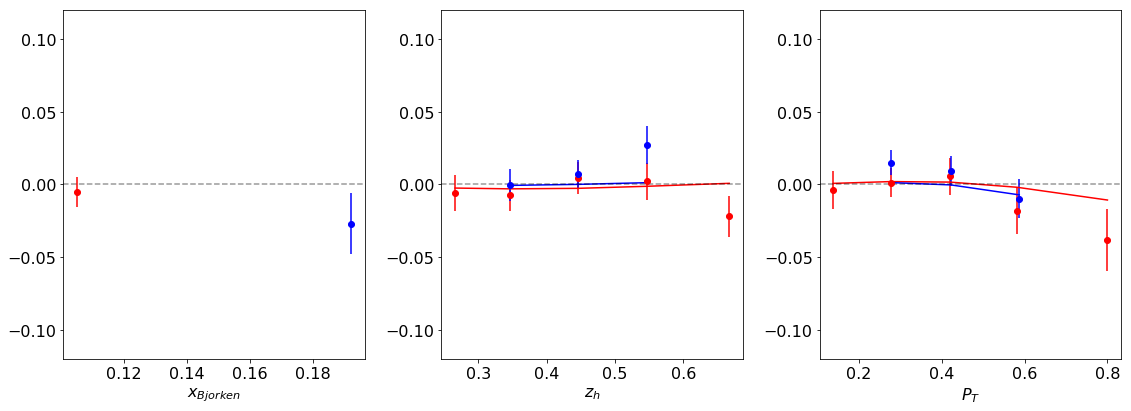

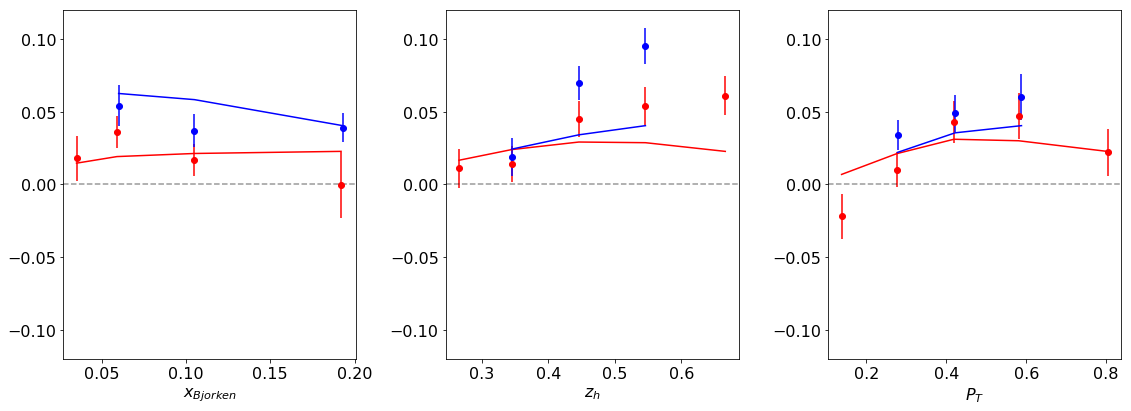

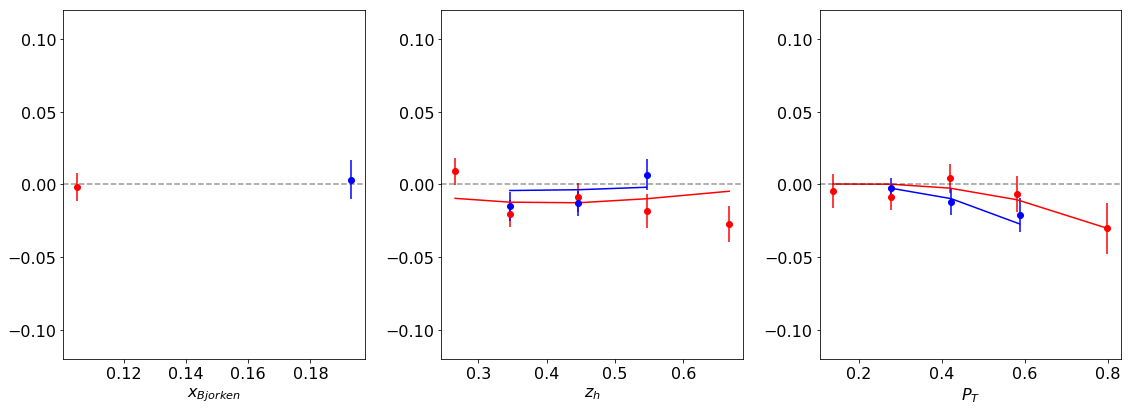

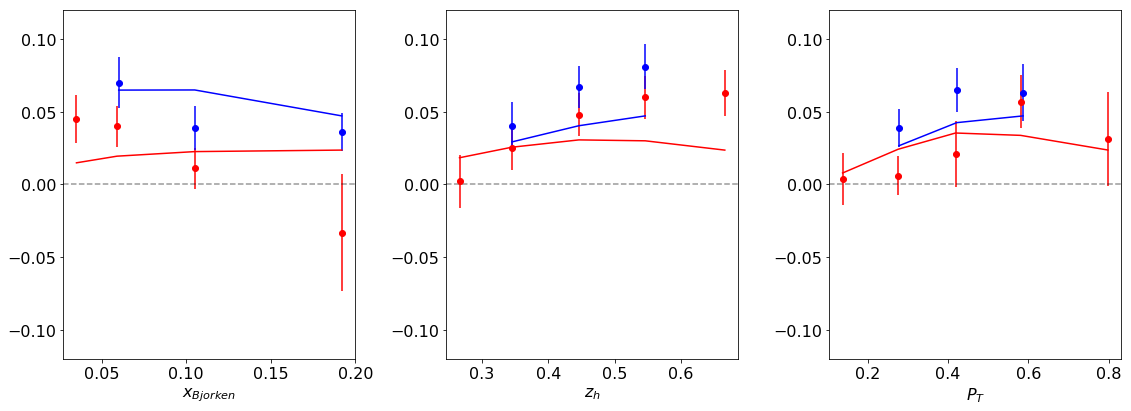

In [11]:
for index, data in datasets.iteritems():
    plot(data)
    
    figure_title = 'summary_plot_%d.pdf' % index
    plt.savefig(figure_title)

In [12]:
data_sub_x = get_axis(datasets[5019], 'x')

In [13]:
data_sub_x

,Ebeam,N,Q2,Shift,alpha,axis,col,hadron,i,obs,...,thy,value,x,y,z,rounded_x,rounded_q2,rounded_y,rounded_z,rounded_pt
0,27.6,1.0,1.399031,0.0,0.015556,x,HERMES,pi-,0,AUUcos2,...,0.014643,0.01800,0.035,0.772,0.667,0.04,1.40,0.77,0.67,0.80
1,27.6,1.0,2.358366,0.0,0.010779,x,HERMES,pi-,1,AUUcos2,...,0.019174,0.03600,0.059,0.772,0.667,0.06,2.36,0.77,0.67,0.80
2,27.6,1.0,4.197092,0.0,0.011092,x,HERMES,pi-,2,AUUcos2,...,0.021307,0.01700,0.105,0.772,0.667,0.10,4.20,0.77,0.67,0.80
3,27.6,1.0,7.674683,0.0,0.022472,x,HERMES,pi-,3,AUUcos2,...,0.022756,-0.00036,0.192,0.772,0.667,0.19,7.67,0.77,0.67,0.80
18,27.6,1.0,2.010006,0.0,0.014039,x,HERMES,pi-,18,AUUcos2,...,0.062539,0.05400,0.060,0.647,0.546,0.06,2.01,0.65,0.55,0.59
19,27.6,1.0,3.517511,0.0,0.011510,x,HERMES,pi-,19,AUUcos2,...,0.058306,0.03700,0.105,0.647,0.546,0.10,3.52,0.65,0.55,0.59
20,27.6,1.0,6.465521,0.0,0.009791,x,HERMES,pi-,20,AUUcos2,...,0.040426,0.03900,0.193,0.647,0.546,0.19,6.47,0.65,0.55,0.59
